**<p style = "text-align: center">TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN - ĐẠI HỌC QUỐC GIA TPHCM</p>**

# **<p style = "text-align: center">NHẬP MÔN KHOA HỌC DỮ LIỆU</p>**
## **<p style = "text-align: center">Đồ án Cuối kì</p>**
### <p style = "text-align: center"> <b>Đề tài:</b> Phân tích, khám phá dữ liệu về sách trên web thương mại điện tử (tiki)</p>
**Sinh viên thực hiện**

| Mã số sinh viên | Họ và tên |
| --- | --- |
| 20120040 | Nguyễn Quang Gia Bảo |
| 20120136 | Huỳnh Tuấn Nam |
| 20120158 | Trần Hoàng Anh Phi |

---

# **1. Thông tin về dữ liệu**<br>
Dữ liệu được sử dụng trong bài được lấy từ trang: <a href = "https://tiki.vn/sach-truyen-tieng-viet/c316"> https://tiki.vn/sach-truyen-tieng-viet/c316</a><br>

Vì website <a href = 'https://tiki.vn/'> https://tiki.vn/ </a> có khá là nhiều mặt hàng nên nhóm chỉ chọn ra danh mục <font color=red>sách tiếng Việt</font> để crawl và thực hiện đồ án này.


# **2. Khám phá dữ liệu**<br>

#### Cài đặt các thư viện cần thiết

In [446]:
# !pip install fuzzywuzzy
# !pip install python-Levenshtein

#### Import các package cần thiết

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#### Đọc dữ liệu đã thu thập từ file csv 

In [448]:
df = pd.read_csv('full_data/data.csv')
print(df.shape)
display(df.head())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21316\906639567.py:1: DtypeWarning: Columns (22,27,29,30,31,32,33,34,35,36,37,38,39,40,41,43,45,46,47,48,49,50,51,52,53,54,56,57,58,59,60,61,62,63,64,65,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('full_data/data.csv')


(96647, 84)


,Unnamed: 0,id,master_id,sku,name,short_url,book_cover,price,original_price,discount_rate,...,kich_thuoc,tai_trong,device_brand,do_nhay,tan_so,huong_dan_bao_quan,dac_diem_noi_bat,dieu_kien_su_dung,dia_chi_su_dung,bluetooth
0,0,204317934,204317934,9972713357587,1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàng,https://tiki.vn/product-p204317934.html?spid=2...,NaN,262000,325000,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,205279963,205279963,7618382614299,1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàng,https://tiki.vn/product-p205279963.html?spid=2...,Bìa mềm,256750,325000,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,193209826,193209826,5001141446127,Con Đường Tơ Lụa - Vạn Dặm Xa Từ Pakistan Tới ...,https://tiki.vn/product-p193209826.html?spid=1...,Bìa mềm,95100,129000,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,205288789,205288789,9035774965791,1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàng,https://tiki.vn/product-p205288789.html?spid=2...,Bìa mềm,292500,325000,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,204649516,204649516,8708257676679,Sách - 1111 - NHẬT KÝ SÁU VẠN DẶM TRÊN YÊN XE ...,https://tiki.vn/product-p204649516.html?spid=2...,NaN,292500,325000,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96647 entries, 0 to 96646
Data columns (total 84 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    96647 non-null  int64  
 1   id                            96647 non-null  int64  
 2   master_id                     96647 non-null  int64  
 3   sku                           96647 non-null  int64  
 4   name                          96647 non-null  object 
 5   short_url                     96647 non-null  object 
 6   book_cover                    66029 non-null  object 
 7   price                         96647 non-null  int64  
 8   original_price                96647 non-null  int64  
 9   discount_rate                 96647 non-null  int64  
 10  rating_average                96647 non-null  float64
 11  review_count                  96647 non-null  int64  
 12  inventory_type                96647 non-null  object 
 13  p

***

## **Cleaning data - Exploratory**

Cột `Unname: 0` trùng với cột index => Xóa nó 

In [450]:
df = df.drop(columns='Unnamed: 0')
df.head()

,id,master_id,sku,name,short_url,book_cover,price,original_price,discount_rate,rating_average,...,kich_thuoc,tai_trong,device_brand,do_nhay,tan_so,huong_dan_bao_quan,dac_diem_noi_bat,dieu_kien_su_dung,dia_chi_su_dung,bluetooth
0,204317934,204317934,9972713357587,1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàng,https://tiki.vn/product-p204317934.html?spid=2...,NaN,262000,325000,19,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,205279963,205279963,7618382614299,1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàng,https://tiki.vn/product-p205279963.html?spid=2...,Bìa mềm,256750,325000,21,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,193209826,193209826,5001141446127,Con Đường Tơ Lụa - Vạn Dặm Xa Từ Pakistan Tới ...,https://tiki.vn/product-p193209826.html?spid=1...,Bìa mềm,95100,129000,26,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,205288789,205288789,9035774965791,1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàng,https://tiki.vn/product-p205288789.html?spid=2...,Bìa mềm,292500,325000,10,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,204649516,204649516,8708257676679,Sách - 1111 - NHẬT KÝ SÁU VẠN DẶM TRÊN YÊN XE ...,https://tiki.vn/product-p204649516.html?spid=2...,NaN,292500,325000,10,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **Xem thử dữ liệu có bị trùng hay không?**

In [451]:
df.shape

(96647, 83)

In [452]:
df.duplicated().sum()

8294

Vậy là dữ liệu có 8294 dòng trùng nhau, ta sẽ tiến hành xoá những dòng này

In [453]:
df = df.drop_duplicates(ignore_index=True)
df.shape

(88353, 83)

#### **Mỗi dòng có ý nghĩa gì? Có các dòng có ý nghĩa khác nhau hay không?**

Mỗi dòng cho biết thông tin về một sản phẩm sách được đăng bán trên tiki. Ví dụ như: <br>
- Mã hàng hóa
- Tên cuốn sách
- Thể loại sách
- Số trang
- Độ dài, rộng, cao của cuốn sách
- Nhà xuất bản
- Nơi xuất khẩu<br>
............

Vì khi thu thập dữ liệu, có những sản phẩm khác loại bị tiki xếp vào chung danh mục nên ta thấy những columns lạ bị thêm vào, ta phải tiến hành xoá những columns này và những sản phẩm (dòng) <font color =red>lạc loài </font>

In [454]:
df.columns

Index(['id', 'master_id', 'sku', 'name', 'short_url', 'book_cover', 'price',
       'original_price', 'discount_rate', 'rating_average', 'review_count',
       'inventory_type', 'productset_group_name', 'day_ago_created',
       'categories', 'all_time_quantity_sold', 'authors', 'publisher_vn',
       'publication_date', 'dimensions', 'manufacturer', 'number_of_page',
       'dich_gia', 'edition', 'brand', 'brand_country', 'item_model_number',
       'origin', 'product_weight', 'battery_capacity', 'camera', 'chong_nuoc',
       'loai_day', 'san_pham', 'storage', 'battery_life', 'charge_time',
       'do_chiu_nuoc', 'included_accessories', 'material', 'luu_y',
       'minimum_inbound_policy_days', 'expiry_time', 'shelf_life_days',
       'chat_lieu', 'audio_power_output', 'audio_technology',
       'dieu_khien_bang_giong_noi', 'dieu_khien_tivi', 'digital_tivi_dvb_t2',
       'display_type', 'frequency', 'hdh_giao_dien',
       'image_processing_technology', 'network_hdmi', 'network_inte

Cột `material` không biết có phải là cột nguyên liệu làm nên quyển sách không.

In [455]:
df[~df['material'].isna()]

,id,master_id,sku,name,short_url,book_cover,price,original_price,discount_rate,rating_average,...,kich_thuoc,tai_trong,device_brand,do_nhay,tan_so,huong_dan_bao_quan,dac_diem_noi_bat,dieu_kien_su_dung,dia_chi_su_dung,bluetooth
13233,144356210,144356210,5525114755464,"Túi đeo chạy bộ, túi đeo hông, đeo bụng dành c...",https://tiki.vn/product-p144356210.html?spid=1...,NaN,112000,139000,19,4.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14886,207035527,207035527,6816910771280,Áo Hoodie Nỉ Ngoại Nữ Thêu Chữ Loang Màu Hồng ...,https://tiki.vn/product-p207035527.html?spid=2...,NaN,109000,109000,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15160,176689612,176689612,9588934896842,Vỏ gối trắng trơn-vỏ gối cao cấp 100% Cotton-t...,https://tiki.vn/product-p176689612.html?spid=1...,NaN,63750,63750,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25077,207631100,207631100,6801021851103,Áo Khoác Nam Nữ Xanh Rêu Áo Khoác Dù Dáng Rộng,https://tiki.vn/product-p207631100.html?spid=2...,NaN,130000,130000,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49830,196565537,196565537,5928507424911,"Rèm Tự Dính-Không Cần Khoan Vô Cùng Tiện Lợi, ...",https://tiki.vn/product-p196565537.html?spid=1...,NaN,52500,105000,50,0.0,...,30 x 20 x 5,5kg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63694,202432845,202432845,8183965466103,BBSTORE'S Đầm Xòe Dự Tiệc Tay Phồng Thời Trang...,https://tiki.vn/product-p202432845.html?spid=2...,NaN,219000,219000,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76899,175150080,175150080,9992881446659,"Bộ Bàn Ghế Gỗ Me Tây Nguyên Khối, Bàn Ghế Ăn G...",https://tiki.vn/product-p175150080.html?spid=1...,NaN,20400000,20400000,0,0.0,...,"3,39 x (70 - 75) x 5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Có vẻ cột `material` không phải như ta "mong ước".

Các `features` được sử dụng

In [456]:
features = ['id', 'master_id', 'sku', 'name', 'short_url', 'book_cover', 'price',
       'original_price', 'discount_rate', 'rating_average', 'review_count',
       'inventory_type', 'productset_group_name', 'day_ago_created',
       'categories', 'all_time_quantity_sold', 'authors', 'publisher_vn',
       'publication_date', 'dimensions', 'manufacturer', 'number_of_page',
       'dich_gia', 'edition', 'luu_y']

Một số `features` không hợp lệ với yêu cầu bài toán

In [457]:
unvalid_cols = list(set(df.columns) - set(features))
print(unvalid_cols)

['size', 'dieu_kien_su_dung', 'origin', 'tan_so', 'huong_dan_bao_quan', 'camera', 'material', 'loai_day', 'weight_with_stand', 'network_hdmi', 'huong_dan_su_dung', 'product_weight', 'size_with_stand_table_top', 'digital_tivi_dvb_t2', 'tivi_type', 'resolution', 'size_without_stand_table_top', 'audio_technology', 'charge_time', 'bluetooth', 'chong_nuoc', 'remote_thong_minh', 'expiry_time', 'battery_capacity', 'battery_life', 'dieu_khien_tivi', 'device_brand', 'dieu_khien_bang_giong_noi', 'do_chiu_nuoc', 'network_wifi', 'display_type', 'dac_diem_noi_bat', 'loai_pin', 'brand_country', 'frequency', 'image_processing_technology', 'ung_dung', 'network_internet', 'do_nhay', 'tai_trong', 'chat_lieu', 'screen_size', 'thoi_gian_su_dung', 'screen_mirroring', 'hdh_giao_dien', 'minimum_inbound_policy_days', 'shelf_life_days', 'brand', 'item_model_number', 'san_pham', 'kich_thuoc', 'included_accessories', 'dia_chi_su_dung', 'audio_power_output', 'weight_without_stand', 'storage', 'capacity', 'usb']


Thử lấy các sản phẩm thuộc ngoài những `categories` của danh mục sách (mà ta đã thu thập)

In [458]:
valid_categories = pd.read_csv('id_data/categories_id.csv')['categories'] 
valid_categories = '|'.join(list(valid_categories)) #+ ['Root', 'Sách tiếng Việt', 'Nhà Sách Tiki'])
# df[df[unvalid_cols].notna().any(axis=1)].to_csv('not_books.csv', encoding='utf-8-sig')
# df[df['publisher_vn'].isna()].to_csv('not_publiser.csv', encoding='utf-8-sig')
# df[df['categories'].str.contains(valid_categories, na=False)]

#Chọn những categories không phải sách
df[~df['categories'].str.contains(valid_categories, na=False)]['categories'].value_counts()

Root                                   20440
Sách tiếng Việt                        19201
Nhà Sách Tiki                             23
Máy Ảnh - Máy Quay Phim                    4
Túi và Hộp Đựng Máy Ảnh                    3
Thiết Bị Số - Phụ Kiện Số                  3
Tai Nghe True Wireless                     2
Đầu Ghi Hình Camera                        1
Nước Ngọt                                  1
Móng giả                                   1
Bộ sản phẩm vệ sinh nhà cửa                1
Làm Đẹp - Sức Khỏe                         1
Thực phẩm khô khác                         1
Loa Vi Tính                                1
Dây Đeo Máy Ảnh, Máy Quay, Ống Nhòm        1
Bình, ly uống trà và phụ kiện              1
Voucher - Dịch vụ                          1
Bàn ghế làm việc                           1
Nón bơi                                    1
Phụ Kiện Máy Quay Khác                     1
Bao Da - Ốp Lưng iPad                      1
Bình đun siêu tốc                          1
Các loại g

 - Loại bỏ tất cả giá trị không `liên quan` đến điều mà ta mong muốn.

In [459]:
df = df[df['categories'].str.contains(valid_categories, na=False)]
# df.shape
df.shape

(48291, 83)

Như vậy sau khi loại bỏ đi các dữ liệu không cần thiết, thì ta còn 48291 dòng.

- Có thể vẫn còn, ta sẽ xem những features bị <font color=red>lạc loài</font> (khác giá trị nan):

In [460]:
unvalid_products = df[df[unvalid_cols].notna().any(axis=1)]
display(unvalid_products)

,id,master_id,sku,name,short_url,book_cover,price,original_price,discount_rate,rating_average,...,kich_thuoc,tai_trong,device_brand,do_nhay,tan_so,huong_dan_bao_quan,dac_diem_noi_bat,dieu_kien_su_dung,dia_chi_su_dung,bluetooth


Tiếp tục bỏ đi những sản phẩm này.

In [461]:
df = df.drop(unvalid_products.index).reset_index(drop=True)
df[df[unvalid_cols].notna().any(axis=1)] # test lại

,id,master_id,sku,name,short_url,book_cover,price,original_price,discount_rate,rating_average,...,kich_thuoc,tai_trong,device_brand,do_nhay,tan_so,huong_dan_bao_quan,dac_diem_noi_bat,dieu_kien_su_dung,dia_chi_su_dung,bluetooth


In [462]:
df.index.max()

48290

Có thể vẫn còn những sản phẩm <font color=red>lạc loài</font> khác, tuy nhiên khó có thể nhận biết và loại bỏ được.

- Xóa đi các cột <font color =red> lạc loài </font> đi thôi!

In [463]:
df = df.drop(unvalid_cols, axis = 1)
df.shape

(48291, 25)

### **Xử lý dữ liệu sau khi loại bỏ các giá trị `lạc loài`**

- Cột `id` và `master_id` có gì liên quan đến nhau không ?

In [464]:
id_cols = ["id", "master_id"]
# df[id_cols].corr()

In [465]:
df[~(df["id"]==df["master_id"])]

,id,master_id,sku,name,short_url,book_cover,price,original_price,discount_rate,rating_average,...,all_time_quantity_sold,authors,publisher_vn,publication_date,dimensions,manufacturer,number_of_page,dich_gia,edition,luu_y


Như vậy 2 cột này hoàn toàn giống nhau. Xóa đi một cột

- Loại bỏ cột `master_id`

In [466]:
df = df.drop("master_id", axis = 1)

- Mô tả thông tin của các cột


In [467]:
pd.read_csv("column/Columns.csv")

,Name,Type,Describe
0,id,string,ID của quyền sách
1,sku,string,Mã hàng hóa
2,name,string,Tên quyển sách
3,short_url,string,Đường link đến trang bán sách
4,book_cover,string,Loại bìa sách
5,price,int,Giá quyển sách đang được bán trên tiki
6,original_price,int,Giá gốc của quyển sách
7,discount_rate,int,% Giảm giá
8,rating_average,float,Mức đánh giát trung bình ( 0 <= x <= 5)
9,review_count,int,"Số lượt đánh giá, bình luận của khách hàng"


- Xem thông tin kiểu dữ liệu của mỗi cột

In [468]:
display(df.dtypes)

id                          int64
sku                         int64
name                       object
short_url                  object
book_cover                 object
price                       int64
original_price              int64
discount_rate               int64
rating_average            float64
review_count                int64
inventory_type             object
productset_group_name      object
day_ago_created             int64
categories                 object
all_time_quantity_sold      int64
authors                    object
publisher_vn               object
publication_date           object
dimensions                 object
manufacturer               object
number_of_page             object
dich_gia                   object
edition                    object
luu_y                      object
dtype: object

Các cột có kiểu dữ liệu là numeric 

In [469]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['id', 'sku', 'price', 'original_price', 'discount_rate',
       'rating_average', 'review_count', 'day_ago_created',
       'all_time_quantity_sold'],
      dtype='object')

Hmm... Lẽ ra cột `number_of_page` phải có kiểu dữ liệu là `numeric` chứ tại sao là `object` !?

In [470]:
# df['number_of_page'].fillna(0).astype(np.int64)
# df['number_of_page'].unique()
set(df['number_of_page'].apply(lambda x: type(x)))

{float, str}

Cột này chứa 2 kiểu dữ liệu là `str` (?) và `float`:
- Tại sao lại chứa kiểu dữ liệu string?

In [471]:
df[df['number_of_page'].apply(lambda x: isinstance(x, str))]['number_of_page'].unique()

array(['336', '178', '216', ..., '10512', '1058', '879'], dtype=object)

Các số là được đưa về kiểu dũ liệu `str`. Nhưng mà để cho chắc, kiểm tra thử xem trong cột này có dạng chữ cái nào không

In [472]:
df[df['number_of_page'].str.contains(r'[a-zA-Z]', na=False)]['number_of_page'].unique()

array(['Cuốn', '80x2', 'mềm'], dtype=object)

- Thì ra các giá trị `integer` đã bị chuyển thành string.
- Một vài giá trị string <font color=red>lạc loài</font> ("Cuốn", "80x2", "mềm") đã làm kiểu dữ liệu bị thay đổi. Ta sẽ chuyển các giá trị này về nan.

In [473]:
df.loc[df['number_of_page'].str.contains(r'[a-zA-Z]', na=False), 'number_of_page'] = np.nan

In [474]:
df['number_of_page'] = df['number_of_page'].fillna(0).astype(np.int64)
df['number_of_page'].dtype

dtype('int64')

Đổi dtype của cột `publication_date` thành datetime

In [475]:
df.publication_date = pd.to_datetime(df.publication_date, format = "%Y-%m-%d %H:%M:%S", errors = "coerce")

In [476]:
np.isnat(df.publication_date).sum()

29534

Gần hơn 1 nửa dữ liệu bị lỗi hoặc thiếu datetime.

Cập nhật lại các giá trị numeric

In [477]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['id', 'sku', 'price', 'original_price', 'discount_rate',
       'rating_average', 'review_count', 'day_ago_created',
       'all_time_quantity_sold', 'number_of_page'],
      dtype='object')

In [478]:
numeric_profiles = {'missing_ratio': df[numeric_cols].isna().sum() * 100.0/len(df[numeric_cols]),
                        'min': df[numeric_cols].min(),
                        'max': df[numeric_cols].max()}
nume_col_profiles_df = pd.DataFrame(numeric_profiles).transpose()
nume_col_profiles_df

,id,sku,price,original_price,discount_rate,rating_average,review_count,day_ago_created,all_time_quantity_sold,number_of_page
missing_ratio,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
min,148562.0,1.000110e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
max,207990688.0,9.999995e+12,6000000.0,6950000.0,91.0,5.0,6306.0,2689.0,32323.0,9.786049e+12


In [479]:
cate_cols = set(df.columns) - set(numeric_cols)
cate_profiles = {'missing_ratio': df[cate_cols].isna().sum() * 100.0/len(df[cate_cols]),
               #   'zero_values_ratio':  df[cate_cols].eq(0).sum(axis=1) * 100.0/len(df[cate_cols]),
                      'num_diff_vals': df[cate_cols].nunique(dropna=True),
                      'diff_vals': df[cate_cols].stack(dropna=True).groupby(level=[1]).unique(),
                      }
cate_col_profiles_df = pd.DataFrame(cate_profiles).transpose()
cate_col_profiles_df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21316\2745435651.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cate_profiles = {'missing_ratio': df[cate_cols].isna().sum() * 100.0/len(df[cate_cols]),
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21316\2745435651.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cate_profiles = {'missing_ratio': df[cate_cols].isna().sum() * 100.0/len(df[cate_cols]),
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21316\2745435651.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  'num_diff_vals': df[cate_cols].nunique(dropna=True),
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21316\2745435651.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  'diff_vals': df[cate_cols].stack(dropna=T

,authors,book_cover,categories,dich_gia,dimensions,edition,inventory_type,luu_y,manufacturer,name,productset_group_name,publication_date,publisher_vn,short_url
missing_ratio,48.804125,35.358555,0.0,85.686774,82.744197,96.931105,0.0,99.995858,0.550827,0.0,0.0,61.158394,0.035203,0.0
num_diff_vals,9094,17,100,3110,1051,364,3,1,168,44424,101,10896,852,48288
diff_vals,"[Trần Đặng Đăng Khoa, Trần Hồng Ngọc, Lê Quang...","[Bìa mềm, Bìa Da, Bìa cứng, Bìa gập, Bìa rời, ...","[Du ký, Light novel, Phê Bình - Lý Luận Văn Họ...","[Khánh Vân, Phan Quang, Nguyễn Thị Bạch Tuyết,...","[13 x 20, 14,5 x 20,5 cm, 13.5 x 20.5 cm, 15 x...","[bìa mềm, BÌA MỀM, Tiếng Việt, Tặng kèm bookma...","[instock, backorder, preorder]",[Sách không còn kèm CD mà thay bằng ứng dụng t...,"[NXB Trẻ, Nhà Xuất Bản Lao Động, Nhà Xuất Bản ...",[1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàn...,[Nhà Sách Tiki/Sách tiếng Việt/Sách văn học/Du...,"[2022-11-10 00:00:00, 2022-11-11 17:44:46, 202...","[NXB Trẻ, Chibooks, Văn Lang, Edibooks, NXB Ph...",[https://tiki.vn/product-p204317934.html?spid=...


Cột `dimension` có gì đó hơi lạ!!!

In [480]:
# df.dimensions
dimen_df  = pd.DataFrame(df.dimensions.copy())
set(df['dimensions'].apply(lambda x: type(x)))

{float, str}

Vừa có `cm` rồi vừa không có.

Tiến hành tạo các list để chứa các chiều rộng, dài, cao của quyển sách

In [481]:
dimen_df["regex_dimen"] = df.dimensions.apply(lambda x: re.findall(r"[0-9]+[,.*]?[0-9]+|/", str(x)))

In [482]:
dimen_df

,dimensions,regex_dimen
0,13 x 20,"[13, 20]"
1,NaN,[]
2,"14,5 x 20,5 cm","[14,5, 20,5]"
3,NaN,[]
4,NaN,[]
...,...,...
48286,NaN,[]
48287,NaN,[]
48288,NaN,[]
48289,NaN,[]


Thấy có vẻ ổn. Nhưng mà thử lại xem có dòng nào bị lỗi không.<br>
Thường sẽ có 3 giá trị trong list `(Chiều cao, Chiều rồng, Chiều dài)`

In [483]:
dimen_df["pivot"] = dimen_df.regex_dimen.apply(lambda x: "1" if len(x) > 3 else "0")
dimen_df[dimen_df["pivot"] == "1"]

,dimensions,regex_dimen,pivot
3175,"<p><span style=""font-size: 11pt; font-family: ...","[11, 13.5, 20, 14720, 10, 11, 14, 2,0, 15, 16,...",1
4012,"<p><span style=""font-size: 11pt; font-family: ...","[11, 13.5, 20, 14720, 10, 11, 14, 2,0, 15, 16,...",1
6485,<p>20.5 x 14.5 x 5.0 cm</p>,"[20.5, 14.5, 5.0, /]",1
12396,"<p class=""MsoNormal""><span lang=""VI"">14</span>...","[14, /, /, 20.5, /, /, /]",1
12981,"<p style=""box-sizing: border-box; margin: 0px ...","[10, 242424, 13, 16, 24, 2,5, /, 10, 242424, 1...",1
14766,"<p style=""box-sizing: border-box; margin: 0px ...","[10, 242424, 13, 13, 19, /, 10, 242424, 13, 60...",1
14779,<p>Kích thước: 16 x 24 x 2 cm. </p>\r\n<p>Trọn...,"[16, 24, /, 600, /]",1
14780,"<p>Kích thước: 13 x 19 x 2,5 cm</p>\r\n<p>Trọn...","[13, 19, 2,5, /, 750, /]",1
14815,"<p><span style=""color: #242424; font-family: R...","[242424, 13, 18, 25, /, /]",1
15777,<p><span>23 x 26 cm</span></p>,"[23, 26, /, /]",1


Có cả link `HTML` vào trong này luôn @@

In [484]:
def SplitNumber(dimension):
    regex_dimen = []
    for d in dimension:
        if d.isnumeric():
            regex_dimen.append(d)
        elif d.strip('0123456789') == '.' or d.strip('0123456789') == ',':
            regex_dimen.append(d)
    return regex_dimen

In [485]:
dimen_df.regex_dimen = dimen_df.regex_dimen.apply(SplitNumber)
# df.dimensions = dimen_df.regex_dimen

In [486]:
dimen_df.iloc[39592]

dimensions     <style type="text/css"><!--td {border: 1px sol...
regex_dimen      [14.5, 20.5, 14337, 14, 15, 16, 11, 14.5, 20.5]
pivot                                                          1
Name: 39592, dtype: object

In [487]:
dimen_df["count"] = dimen_df.regex_dimen.apply(lambda x: len(x) if x != None else 0)

In [491]:
dimen_df["count"].value_counts()

0     39975
2      8152
3       143
1         9
4         7
13        2
9         2
10        1
Name: count, dtype: int64

<AxesSubplot: >

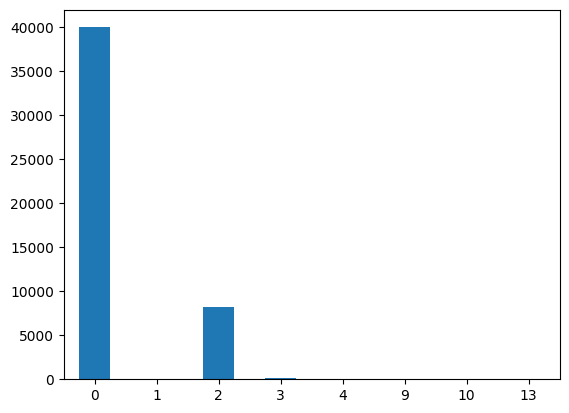

In [488]:
dimen_df["count"].value_counts().sort_index().plot.bar(rot = 0)

In [489]:
df.dimensions = dimen_df.regex_dimen

Xử lý dimensions vẫn chưa toàn diện, vì có các số gây nhiễu, khó mà loại bỏ.

**Save dữ liệu đã xử lý để phục vụ cho việc xây dựng mô hình**

In [492]:
import os
os.mkdir('./features')
df.to_csv('./features/processed.csv',index=False, encoding='utf-8-sig')